In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset.csv')
df.head(20)

,orig_idx_in_40000_dataset,question,ground_truth_answer,uncertainty_expression,llm_confidence_level,source_llm,annotater_confidence_score1,annotater_confidence_score2,annotater_confidence_score3,annotater_confidence_score4,annotater_confidence_score5
0,18426,"According to the Warcraft wiki, approximately ...",13000,"I think the Warcraft wiki says 13,000 years, b...",low,GPT-4o,74,9,52,20,74
1,23519,Which scientist received the Roebling Medal th...,Linus Pauling,All signs point to Linus Pauling.,moderate,Gemini-2.5 Pro,73,46,52,71,62
2,32909,What is the maximum depth of the Mediterranean...,5109 m,The Mediterranean Sea's maximum depth measures...,high,Claude Sonnet 4,77,81,57,84,31
3,3716,"What month, day, and year did Laura Toggs and ...",May 10 2023,"To the best of my recollection, it was May 10,...",moderate,Grok-3,84,86,54,72,68
4,611,"What day, month, and year was David Crombie ap...",13 May 2004,I believe it was 13 May 2004 when he received ...,moderate,Grok-3,83,71,53,78,88
5,16477,Which college in Srinagar was accredited as th...,Islamia College of Science and Commerce,Perhaps Islamia College of Science and Commerc...,low,GPT-4o,68,86,53,76,64
6,5704,What were the month and year when Netflix anno...,August 2011,I can assure you that Netflix officially suppo...,high,Grok-3,80,87,53,86,31
7,8267,In which year was the municipality of Heliconi...,1814,I’m fairly confident that the founding of Heli...,moderate,Grok-3,66,45,54,83,20
8,29023,In what year did the Colombian mathematician J...,1994,My tentative answer is 1994.,low,Gemini-2.5 Pro,32,19,54,67,34
9,16448,Who was the umpire in the 1980 Gillette Cup ma...,Ken Palmer & Roy Palmer,"That information isn’t available to me, so I c...",completely uncertain,GPT-4o,45,75,52,55,65


<Axes: xlabel='llm_confidence_level'>

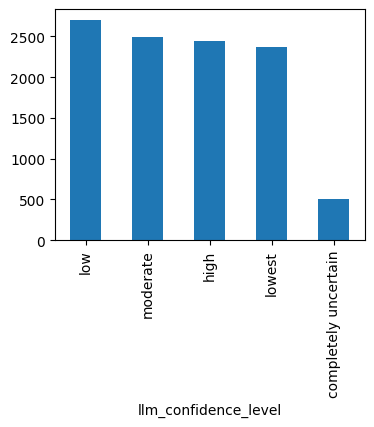

In [3]:
df['source_llm'].value_counts().plot(kind='bar', figsize=(4, 3))
df['llm_confidence_level'].value_counts().plot(kind='bar', figsize=(4, 3))

<Axes: xlabel='Annotator Confidence Score 1', ylabel='Frequency'>

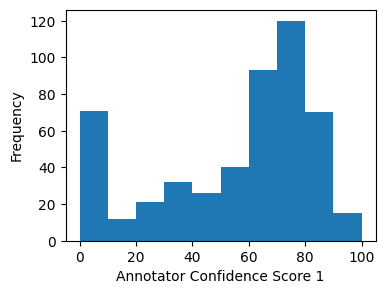

In [4]:
from matplotlib.pyplot import xlabel


df[df['llm_confidence_level']=='completely uncertain']['annotater_confidence_score1'].plot(kind='hist', figsize=(4, 3), xlabel='Annotator Confidence Score 1', ylabel='Frequency')

In [5]:
import pandas as pd

dataset_df = pd.DataFrame(columns=['orig_idx_in_40000_dataset', 'question', 'ground_truth_answer' 'uncertainty_expression', 'llm_confidence_level', 'source_llm', 'annotater_confidence_score1', 'annotater_confidence_score2', 'annotater_confidence_score3', 'annotater_confidence_score4', 'annotater_confidence_score5'])
sampled_10000_df = pd.read_csv('../sampled_10000_sentences.csv')
annotation_df = pd.read_csv('../annotation.csv')
orig_idx_anno_pair = {}
for _, row in annotation_df.iterrows():
    accept_flag = False
    for i in range(1, 101):
        orig_idx = row[f'Input.index_{i}']
        anno_conf = row[f'Answer.confidence_score_sentence_{i}']
        query1 = sampled_10000_df['orig_idx'] == orig_idx
        query2 = sampled_10000_df['confidence'] == 'completely uncertain'
        if (sampled_10000_df[query1 & query2].shape[0] > 0) and (float(anno_conf) == 0):
            accept_flag = True
            break
        else:
            accept_flag = False
    if accept_flag == False:
        continue
    for i in range(1, 101):
        orig_idx_col_name = f'Input.index_{i}'
        sent_col_name = f'Input.sentence_{i}'
        anno_col_name = f'Answer.confidence_score_sentence_{i}'
        orig_idx = row[orig_idx_col_name]
        anno_conf = row[anno_col_name]
        if orig_idx not in orig_idx_anno_pair:
            orig_idx_anno_pair[orig_idx] = [anno_conf]
        else:
            orig_idx_anno_pair[orig_idx].append(anno_conf)
            
rows_to_add = []
# save to df
for orig_idx, anno_confs in orig_idx_anno_pair.items():
    new_row = {
        'orig_idx_in_40000_dataset': orig_idx,
        'question': sampled_10000_df.loc[sampled_10000_df['orig_idx'] == orig_idx, 'problem'].values[0],
        'ground_truth_answer': sampled_10000_df.loc[sampled_10000_df['orig_idx'] == orig_idx, 'answer'].values[0],
        'uncertainty_expression': sampled_10000_df.loc[sampled_10000_df['orig_idx'] == orig_idx, 'sentence'].values[0],
        'llm_confidence_level': sampled_10000_df.loc[sampled_10000_df['orig_idx'] == orig_idx, 'confidence'].values[0],
        'source_llm': sampled_10000_df.loc[sampled_10000_df['orig_idx'] == orig_idx, 'model'].values[0],
        'annotater_confidence_score1': anno_confs[0] if len(anno_confs) > 0 else None,
        'annotater_confidence_score2': anno_confs[1] if len(anno_confs) > 1 else None,
        'annotater_confidence_score3': anno_confs[2] if len(anno_confs) > 2 else None,
        'annotater_confidence_score4': anno_confs[3] if len(anno_confs) > 3 else None,
        'annotater_confidence_score5': anno_confs[4] if len(anno_confs) > 4 else None
    }
    rows_to_add.append(new_row)
dataset_df = pd.DataFrame(rows_to_add)
print(len(dataset_df))

2600


In [6]:
dataset_df['annotater_confidence_score1'].isnull().sum() + dataset_df['annotater_confidence_score2'].isnull().sum() + dataset_df['annotater_confidence_score3'].isnull().sum() + dataset_df['annotater_confidence_score4'].isnull().sum() + dataset_df['annotater_confidence_score5'].isnull().sum()

np.int64(9800)

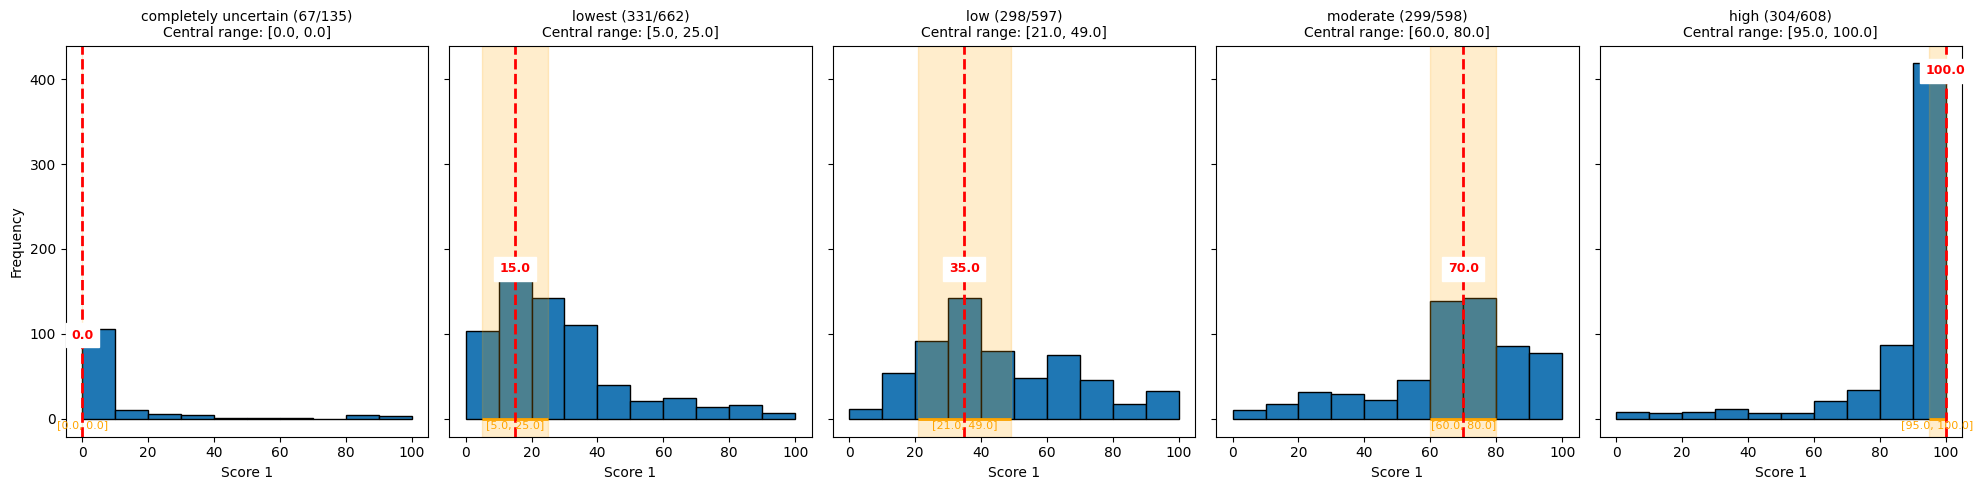

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# 人为定义central点
manual_central_points = {
    'completely uncertain': 0,
    'lowest': 15,
    'low': 35,
    'moderate': 70,
    'high': 100
}

central_ratio = 0.5
confidence_levels = ['completely uncertain', 'lowest', 'low', 'moderate', 'high']

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
for idx, confidence_level in enumerate(confidence_levels):
    ax = axes[idx]
    # 只统计llm_confidence_level为当前level且annotater_confidence_score1非空的数量
    score1 = dataset_df[dataset_df['llm_confidence_level'] == confidence_level]['annotater_confidence_score1']
    score1 = score1.dropna()
    sorted_scores = np.sort(score1.values)
    total = dataset_df[dataset_df['llm_confidence_level'] == confidence_level].shape[0]
    # 计算central区间的范围（以指定中心点为中心）
    if len(sorted_scores) > 0:
        central_point = manual_central_points[confidence_level]
        # 计算central_count
        central_count = int(len(sorted_scores) * central_ratio)
        # 找到距离central_point最近的central_count个分数
        abs_dists = np.abs(sorted_scores - central_point)
        nearest_indices = np.argsort(abs_dists)[:central_count]
        # 取这central_count个分数的最小和最大值作为central_min和central_max
        central_min = np.min(sorted_scores[nearest_indices])
        central_max = np.max(sorted_scores[nearest_indices])
        num_included = central_count
        n, bins, patches = ax.hist(score1, bins=10, edgecolor='black')
        ax.set_xlabel('Score 1', fontsize=10)
        if idx == 0:
            ax.set_ylabel('Frequency', fontsize=10)
        # 在title里写上central区间是什么数值
        ax.set_title(
            f"{confidence_level} ({num_included}/{total})\n"
            f"Central range: [{central_min:.1f}, {central_max:.1f}]",
            fontsize=10
        )
        # 画central区间
        ax.axvspan(central_min, central_max, color='orange', alpha=0.2, label=f'Central {int(central_ratio*100)}%')
        # 标注central区间
        ax.hlines(y=-0.5, xmin=central_min, xmax=central_max, color='orange', linewidth=2)
        ax.text((central_min+central_max)/2, -1.5, 
                f'[{central_min:.1f}, {central_max:.1f}]', 
                ha='center', va='top', color='orange', fontsize=8)
        # 标注central点（人为指定）
        ax.axvline(central_point, color='red', linestyle='--', linewidth=2, label='Manual Central Point')
        ax.text(central_point, ax.get_ylim()[1]*0.95, 
                f'{central_point:.1f}', 
                color='red', fontsize=9, ha='center', va='top', fontweight='bold', backgroundcolor='white')
    else:
        num_included = 0
        ax.set_title(f"{confidence_level}\n({num_included}/{total})\nCentral bin: N/A", fontsize=10)
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

In [113]:
# check how many answers fall within the predefined confidence range
predefined_confidence_range = {
    'completely uncertain': (0, 1),
    'lowest': (5, 25),
    'low': (21, 49),
    'moderate': (60, 80),
    'high': (95, 100)
}

dataset_df_full = pd.read_csv('../dataset.csv')
# add another column to the dataset_df_full to indicate how many annotater_confidence_score fall within the predefined confidence range for each row
# check annotater_confidence_score1, annotater_confidence_score2, annotater_confidence_score3, annotater_confidence_score4, annotater_confidence_score5
dataset_df_full['valid_confidence_score_count'] = 0
count_list = {
    'completely uncertain': 0,
    'lowest': 0,
    'low': 0,
    'moderate': 0,
    'high': 0
}
# for each row, check if any of the annotater_confidence_score falls within the predefined confidence range
for index, row in dataset_df_full.iterrows():
    confidence_range = predefined_confidence_range[row['llm_confidence_level']]
    if row['annotater_confidence_score1'] >= confidence_range[0] and row['annotater_confidence_score1'] <= confidence_range[1]:
        dataset_df_full.at[index, 'valid_confidence_score_count'] += 1
        count_list[row['llm_confidence_level']] += 1
    if row['annotater_confidence_score2'] >= confidence_range[0] and row['annotater_confidence_score2'] <= confidence_range[1]:
        dataset_df_full.at[index, 'valid_confidence_score_count'] += 1
        count_list[row['llm_confidence_level']] += 1
    if row['annotater_confidence_score3'] >= confidence_range[0] and row['annotater_confidence_score3'] <= confidence_range[1]:
        dataset_df_full.at[index, 'valid_confidence_score_count'] += 1
        count_list[row['llm_confidence_level']] += 1
    if row['annotater_confidence_score4'] >= confidence_range[0] and row['annotater_confidence_score4'] <= confidence_range[1]:
        dataset_df_full.at[index, 'valid_confidence_score_count'] += 1
        count_list[row['llm_confidence_level']] += 1
    if row['annotater_confidence_score5'] >= confidence_range[0] and row['annotater_confidence_score5'] <= confidence_range[1]:
        dataset_df_full.at[index, 'valid_confidence_score_count'] += 1
        count_list[row['llm_confidence_level']] += 1

print(count_list)
print("total count: ", sum(count_list.values()))
# check the distribution of the valid_confidence_score_count
dataset_df_full['valid_confidence_score_count'].value_counts()

{'completely uncertain': 135, 'lowest': 2088, 'low': 3607, 'moderate': 5393, 'high': 1539}
total count:  12762


valid_confidence_score_count
1    3214
0    3077
2    2098
3    1153
4     397
5      61
Name: count, dtype: int64

In [121]:
# check how many answers fall within the predefined confidence range
predefined_confidence_range = {
    'completely uncertain': (0, 4),
    'lowest': (5, 25),
    'low': (21, 49),
    'moderate': (60, 80),
    'high': (95, 100)
}

import numpy as np

df_conf_check = pd.read_csv('../dataset.csv')
# add another column to the df_conf_check to indicate how many annotater_confidence_score fall within the predefined confidence range for each row
score_cols = [
    'annotater_confidence_score1',
    'annotater_confidence_score2',
    'annotater_confidence_score3',
    'annotater_confidence_score4',
    'annotater_confidence_score5'
]
df_conf_check['valid_confidence_score_count'] = 0
count_list = {
    'completely uncertain': 0,
    'lowest': 0,
    'low': 0,
    'moderate': 0,
    'high': 0
}

for index, row in df_conf_check.iterrows():
    confidence_range = predefined_confidence_range[row['llm_confidence_level']]
    valid_count = 0
    for col in score_cols:
        score = row[col]
        if confidence_range[0] <= score <= confidence_range[1]:
            valid_count += 1
            count_list[row['llm_confidence_level']] += 1
        else:
            df_conf_check.at[index, col] = np.nan
    df_conf_check.at[index, 'valid_confidence_score_count'] = valid_count

print(count_list)
print("total count: ", sum(count_list.values()))
# check the distribution of the valid_confidence_score_count
df_conf_check['valid_confidence_score_count'].value_counts()
df_conf_check

{'completely uncertain': 304, 'lowest': 2088, 'low': 3607, 'moderate': 5393, 'high': 1539}
total count:  12931


,orig_idx_in_40000_dataset,question,ground_truth_answer,uncertainty_expression,llm_confidence_level,source_llm,annotater_confidence_score1,annotater_confidence_score2,annotater_confidence_score3,annotater_confidence_score4,annotater_confidence_score5,valid_confidence_score_count
0,18426,"According to the Warcraft wiki, approximately ...",13000,"I think the Warcraft wiki says 13,000 years, b...",low,GPT-4o,NaN,NaN,NaN,NaN,NaN,0
1,23519,Which scientist received the Roebling Medal th...,Linus Pauling,All signs point to Linus Pauling.,moderate,Gemini-2.5 Pro,73.0,NaN,NaN,71.0,62.0,3
2,32909,What is the maximum depth of the Mediterranean...,5109 m,The Mediterranean Sea's maximum depth measures...,high,Claude Sonnet 4,NaN,NaN,NaN,NaN,NaN,0
3,3716,"What month, day, and year did Laura Toggs and ...",May 10 2023,"To the best of my recollection, it was May 10,...",moderate,Grok-3,NaN,NaN,NaN,72.0,68.0,2
4,611,"What day, month, and year was David Crombie ap...",13 May 2004,I believe it was 13 May 2004 when he received ...,moderate,Grok-3,NaN,71.0,NaN,78.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,37326,"What venue did Ciara perform at on May 27, 201...",House of Blues,I suspect that Ciara performed at the House of...,low,Claude Sonnet 4,NaN,NaN,NaN,NaN,NaN,0
9996,12866,What is the name and length of the 12th song o...,"A Walk in Andante, 1:18","If memory serves, ""A Walk in Andante"" is the 1...",moderate,GPT-4o,66.0,80.0,73.0,79.0,69.0,5
9997,20622,"What day, month, and year was David Crombie ap...",13 May 2004,"I'm not entirely sure, but my notes suggest 13...",low,Gemini-2.5 Pro,NaN,NaN,NaN,NaN,45.0,1
9998,18055,Who were the seven countries that participated...,"Russia, Ukraine, Belarus, Poland. Italy, Germa...","Russia, Ukraine, Belarus, Poland, Italy, Germa...",high,GPT-4o,NaN,NaN,NaN,NaN,NaN,0


In [122]:
df_conf_check[df_conf_check['valid_confidence_score_count']>=1]

,orig_idx_in_40000_dataset,question,ground_truth_answer,uncertainty_expression,llm_confidence_level,source_llm,annotater_confidence_score1,annotater_confidence_score2,annotater_confidence_score3,annotater_confidence_score4,annotater_confidence_score5,valid_confidence_score_count
1,23519,Which scientist received the Roebling Medal th...,Linus Pauling,All signs point to Linus Pauling.,moderate,Gemini-2.5 Pro,73.0,NaN,NaN,71.0,62.0,3
3,3716,"What month, day, and year did Laura Toggs and ...",May 10 2023,"To the best of my recollection, it was May 10,...",moderate,Grok-3,NaN,NaN,NaN,72.0,68.0,2
4,611,"What day, month, and year was David Crombie ap...",13 May 2004,I believe it was 13 May 2004 when he received ...,moderate,Grok-3,NaN,71.0,NaN,78.0,NaN,2
7,8267,In which year was the municipality of Heliconi...,1814,I’m fairly confident that the founding of Heli...,moderate,Grok-3,66.0,NaN,NaN,NaN,NaN,1
8,29023,In what year did the Colombian mathematician J...,1994,My tentative answer is 1994.,low,Gemini-2.5 Pro,32.0,NaN,NaN,NaN,34.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9269,Who finished 14th in the 2021–22 Premier Leagu...,Aston Villa,I’m inclined to think that Aston Villa ended t...,moderate,Grok-3,71.0,63.0,65.0,NaN,63.0,4
9992,33664,What nationality is the engineer who financed ...,British,The engineer was probably British.,moderate,Claude Sonnet 4,NaN,69.0,75.0,64.0,71.0,4
9993,22549,How many daughters did the mathematician Hsien...,3,I searched my knowledge base but could not fin...,completely uncertain,Gemini-2.5 Pro,NaN,NaN,NaN,NaN,3.0,1
9996,12866,What is the name and length of the 12th song o...,"A Walk in Andante, 1:18","If memory serves, ""A Walk in Andante"" is the 1...",moderate,GPT-4o,66.0,80.0,73.0,79.0,69.0,5


In [123]:
df_conf_check['llm_confidence_level'].value_counts()

llm_confidence_level
low                     2375
moderate                2375
high                    2375
lowest                  2375
completely uncertain     500
Name: count, dtype: int64

In [124]:
df_conf_check['valid_confidence_score_count'].value_counts()

valid_confidence_score_count
1    3298
0    2956
2    2124
3    1164
4     397
5      61
Name: count, dtype: int64

In [125]:
df_conf_check['annotation_mean'] = df_conf_check[['annotater_confidence_score1', 'annotater_confidence_score2', 'annotater_confidence_score3', 'annotater_confidence_score4', 'annotater_confidence_score5']].mean(axis=1, skipna=True)

In [126]:
df_conf_check[df_conf_check['valid_confidence_score_count'] >= 1].to_csv('dataset_valid_confidence_score_count_1.csv', index=False)
df_conf_check[df_conf_check['valid_confidence_score_count'] >= 2].to_csv('dataset_valid_confidence_score_count_2.csv', index=False)
df_conf_check[df_conf_check['valid_confidence_score_count'] >= 3].to_csv('dataset_valid_confidence_score_count_3.csv', index=False)
df_conf_check[df_conf_check['valid_confidence_score_count'] >= 4].to_csv('dataset_valid_confidence_score_count_4.csv', index=False)
df_conf_check[df_conf_check['valid_confidence_score_count'] >= 5].to_csv('dataset_valid_confidence_score_count_5.csv', index=False)

In [129]:
test_df = pd.read_csv('dataset_valid_confidence_score_count_3.csv')
test_df['llm_confidence_level'].value_counts()

llm_confidence_level
moderate                988
low                     428
lowest                  131
high                     64
completely uncertain     11
Name: count, dtype: int64